### Imports

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skmultiflow.drift_detection import DDM
from IPython.display import Image
from skmultiflow.drift_detection.adwin import ADWIN
from skmultiflow.drift_detection import PageHinkley
from skmultiflow.drift_detection.hddm_a import HDDM_A
from skmultiflow.drift_detection import KSWIN
from IPython.display import HTML
from matplotlib import animation, rc

### Data

In [4]:
series1 = pd.read_csv('data/series1.csv')
series2 = pd.read_csv('data/series2.csv')
series3 = pd.read_csv('data/series3.csv')

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

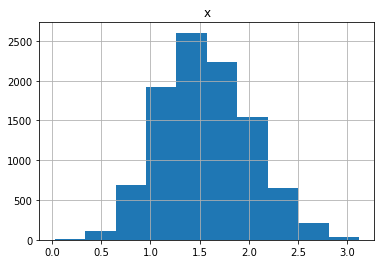

In [6]:
series1.hist()

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

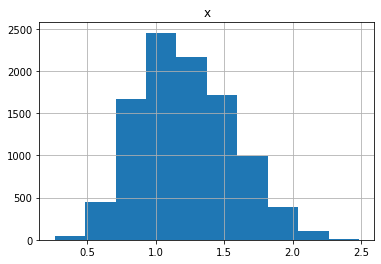

In [7]:
series2.hist()

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

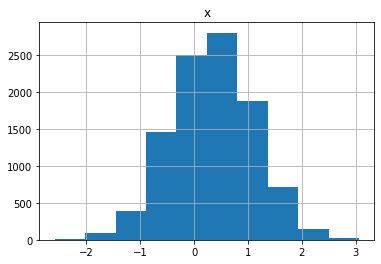

In [8]:
series3.hist()

In [170]:
def animate_distribution(df):
    #n = 10
    number_of_frames = 100
    fig = plt.figure()

    def update_hist(num, data):
        data.append(float(df.iloc[[num]]['x']))
        plt.cla()
        plt.hist(data)
   
    def init():
        hist = plt.hist([])
        return (hist,)
    
    #hist = plt.hist(data[0])

    anim = animation.FuncAnimation(
            fig, update_hist, number_of_frames, init_func=init, fargs=(data, ) 
        )
    return anim.to_jshtml()
    

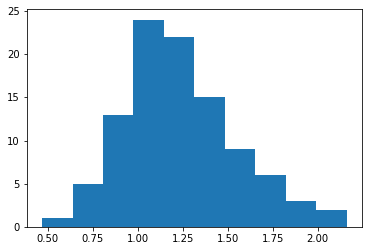

In [171]:
data =[]
HTML(animate_distribution(series1))

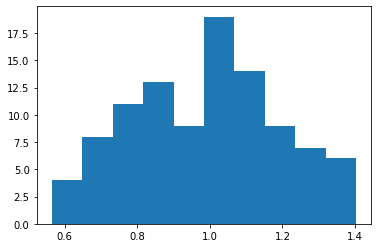

In [172]:
data =[]
HTML(animate_distribution(series2))

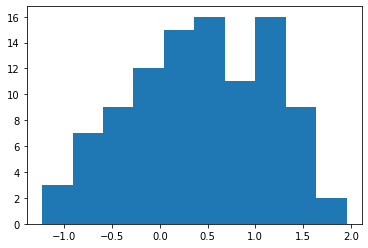

In [173]:
data =[]
HTML(animate_distribution(series3))

### Concept Drift Detection

scikit-multiflow methods for Concept Drift Detection

**Helpers**

In [50]:
def ranges(seq):
    start, end = seq[0], seq[0]
    count = start
    for item in seq:
        if not count == item:
            yield start, end
            start, end = item, item
            count = item
        end = item
        count += 1
    yield start, end

print(list(ranges([1,2,3,4,5,8,9,10,11,200,201,202])))

[(1, 5), (8, 11), (200, 202)]


In [87]:
def draw_plot(change_points, warning_zone, series):
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=series)
    cnt1 = 0
    cnt2 = 0
    if len(warning_zone)>0:
        for l in list(ranges(warning_zone)):
            if l[1] - l[0] > 100:
                if cnt1==0:
                    plt.axvline(l[0], color='orange', ls='--', label = 'warning zone')
                    plt.axvline(l[1], color='orange', ls='--')
                    cnt1+=1
                else:
                    plt.axvline(l[0], color='orange', ls='--')
                    plt.axvline(l[1], color='orange', ls='--')
    for point in change_points:
        if cnt2 ==0:
            plt.axvline(point, color='red', label = 'detection')
            cnt2+=1
        else:
            plt.axvline(point, color='red')
    plt.legend()

**DDM**

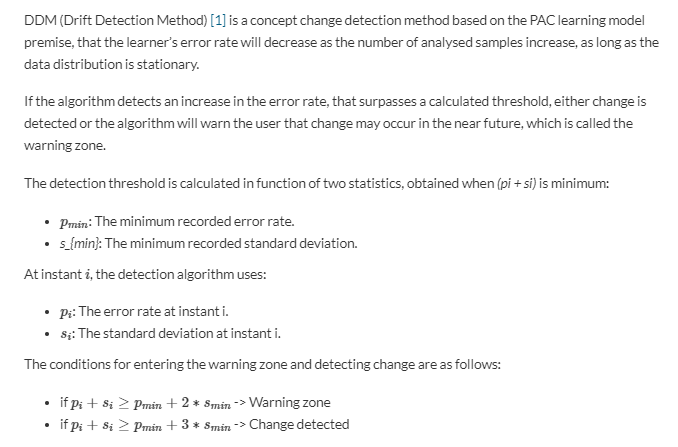

In [65]:
Image(filename = "image/DDM.PNG")

In [37]:
def ddm(series):
    ddm = DDM()
    change_points = []
    warning_zone = []
    for idx, row in series.iterrows():
        ddm.add_element(row['x'])
        if ddm.detected_warning_zone():
            warning_zone.append(idx)
            print("Warning zone has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
        if ddm.detected_change():
            change_points.append(idx)
            print("Change has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
    return change_points, warning_zone

In [27]:
change_points1, warning_zone1 = ddm(series1)

In [28]:
change_points2, warning_zone2 = ddm(series2)

Warning zone has been detected in data: 1.09253193395076 - of index: 1775
Warning zone has been detected in data: 1.10398400539706 - of index: 1776
Warning zone has been detected in data: 1.19920091544887 - of index: 1778
Warning zone has been detected in data: 1.07359849844249 - of index: 1779
Warning zone has been detected in data: 0.701269550283832 - of index: 1780
Warning zone has been detected in data: 1.1802436896926 - of index: 1830
Warning zone has been detected in data: 1.10030218671859 - of index: 1832
Warning zone has been detected in data: 1.05561446819939 - of index: 1833
Warning zone has been detected in data: 0.949823103947565 - of index: 1834
Warning zone has been detected in data: 0.858087677943927 - of index: 1835
Warning zone has been detected in data: 1.2994044741898 - of index: 1870
Warning zone has been detected in data: 0.972904344946554 - of index: 1871
Warning zone has been detected in data: 1.03119844603521 - of index: 1874
Warning zone has been detected in da

Warning zone has been detected in data: 0.983913065206465 - of index: 2451
Warning zone has been detected in data: 1.01253030920745 - of index: 2452
Warning zone has been detected in data: 0.941796681172064 - of index: 2453
Warning zone has been detected in data: 0.678944413703126 - of index: 2454
Warning zone has been detected in data: 1.08262497569364 - of index: 2455
Warning zone has been detected in data: 1.07988365470479 - of index: 2456
Warning zone has been detected in data: 0.97822555534356 - of index: 2457
Warning zone has been detected in data: 1.03579353093682 - of index: 2458
Warning zone has been detected in data: 0.447995710855759 - of index: 2459
Warning zone has been detected in data: 0.893482674807303 - of index: 2460
Warning zone has been detected in data: 0.755451336351876 - of index: 2461
Warning zone has been detected in data: 0.522849574487478 - of index: 2462
Warning zone has been detected in data: 0.779051684428361 - of index: 2463
Warning zone has been detected

Warning zone has been detected in data: 1.30127059384845 - of index: 2924
Warning zone has been detected in data: 1.07211519353585 - of index: 2925
Warning zone has been detected in data: 1.38381441250493 - of index: 2926
Warning zone has been detected in data: 0.820671892603304 - of index: 2927
Warning zone has been detected in data: 0.727242926544534 - of index: 2928
Warning zone has been detected in data: 1.24558636691073 - of index: 2929
Warning zone has been detected in data: 0.834722547381636 - of index: 2930
Warning zone has been detected in data: 0.378596484501566 - of index: 2931
Warning zone has been detected in data: 0.988458426910054 - of index: 2932
Warning zone has been detected in data: 1.29475620742431 - of index: 2940
Warning zone has been detected in data: 0.878858104873493 - of index: 2941
Warning zone has been detected in data: 1.18165465230908 - of index: 2942
Warning zone has been detected in data: 1.13462935249852 - of index: 2943
Warning zone has been detected i

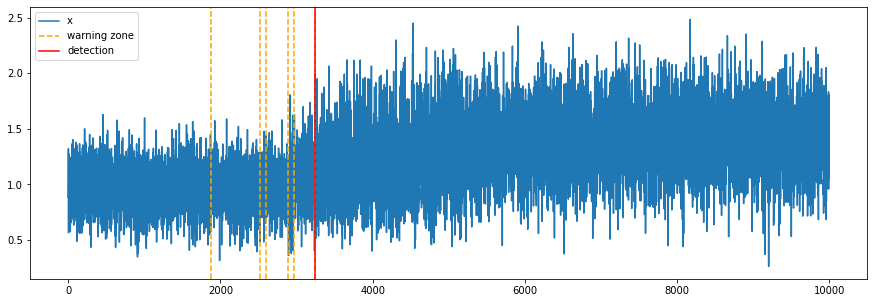

In [77]:
draw_plot(change_points2, warning_zone2, series2)

In [29]:
change_points3, warning_zone3 = ddm(series3)

Warning zone has been detected in data: 1.07447502379553 - of index: 34
Warning zone has been detected in data: 1.32732271498314 - of index: 35
Warning zone has been detected in data: 0.124253950806773 - of index: 36
Warning zone has been detected in data: 0.350167856622971 - of index: 37
Warning zone has been detected in data: -0.107099947482467 - of index: 38
Warning zone has been detected in data: 1.02440317700053 - of index: 39
Warning zone has been detected in data: 0.321137005898456 - of index: 40
Warning zone has been detected in data: -0.71246551994394 - of index: 41
Warning zone has been detected in data: 0.549422609304574 - of index: 42
Warning zone has been detected in data: -0.309893381634352 - of index: 43
Warning zone has been detected in data: 1.07119008556183 - of index: 50
Warning zone has been detected in data: -0.0799956689009333 - of index: 51
Warning zone has been detected in data: 1.79946283472258 - of index: 55
Warning zone has been detected in data: 0.8678330111

Warning zone has been detected in data: -0.101412474046995 - of index: 945
Warning zone has been detected in data: 0.0869730252755355 - of index: 946
Warning zone has been detected in data: 1.46273966797822 - of index: 947
Warning zone has been detected in data: 0.934301813400295 - of index: 948
Warning zone has been detected in data: -0.0379649324458702 - of index: 949
Warning zone has been detected in data: 1.36950008758151 - of index: 950
Warning zone has been detected in data: -0.287805719504308 - of index: 951
Warning zone has been detected in data: 1.16749934489792 - of index: 952
Warning zone has been detected in data: -0.830480274296036 - of index: 953
Warning zone has been detected in data: 0.598361580315351 - of index: 954
Warning zone has been detected in data: 0.140640395404534 - of index: 955
Warning zone has been detected in data: 0.952498988315436 - of index: 956
Warning zone has been detected in data: 0.84514803667549 - of index: 957
Warning zone has been detected in da

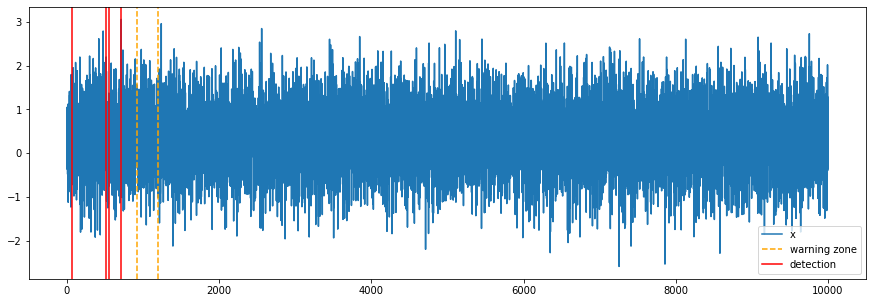

In [78]:
draw_plot(change_points3, warning_zone3, series3)

**ADWIN**

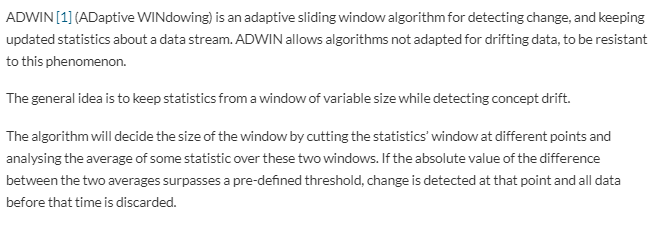

In [91]:
Image(filename = "image/ADWIN.PNG")

In [67]:
def adwin(series):
    adwin = ADWIN()
    change_points = []
    warning_zone = []
    for idx, row in series.iterrows():
        adwin.add_element(row['x'])
        if adwin.detected_warning_zone():
            warning_zone.append(idx)
            print("Warning zone has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
        if adwin.detected_change():
            change_points.append(idx)
            print("Change has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
    return change_points, warning_zone

In [79]:
change_points1, warning_zone1 = adwin(series1)

Change has been detected in data: 1.40454019740779 - of index: 3007
Change has been detected in data: 2.26367419316964 - of index: 3327
Change has been detected in data: 1.47067114309803 - of index: 3359
Change has been detected in data: 1.46951985195725 - of index: 3455
Change has been detected in data: 1.04155997255274 - of index: 3519
Change has been detected in data: 2.22150681018205 - of index: 3711
Change has been detected in data: 1.22649382165417 - of index: 4479
Change has been detected in data: 1.32665396781721 - of index: 4927
Change has been detected in data: 1.96548810371677 - of index: 5695
Change has been detected in data: 2.27856974145354 - of index: 5887
Change has been detected in data: 1.57344302357862 - of index: 5951
Change has been detected in data: 1.87370071142426 - of index: 6271
Change has been detected in data: 1.61358264023167 - of index: 7999


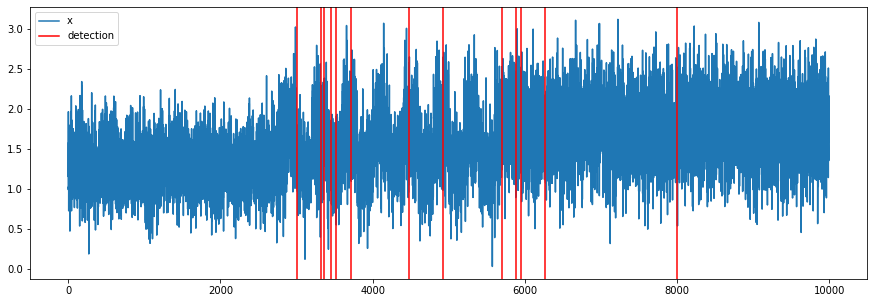

In [88]:
draw_plot(change_points1, warning_zone1, series1)

In [89]:
change_points2, warning_zone2 = adwin(series2)

Change has been detected in data: 1.2774575868892 - of index: 3743
Change has been detected in data: 1.18499467777305 - of index: 3807
Change has been detected in data: 1.02733893928192 - of index: 3903
Change has been detected in data: 1.19395568025435 - of index: 3999
Change has been detected in data: 0.887373440921126 - of index: 4351
Change has been detected in data: 1.18389562435388 - of index: 4479
Change has been detected in data: 1.47806837137173 - of index: 4863
Change has been detected in data: 1.04563724326845 - of index: 5087
Change has been detected in data: 1.70412772798626 - of index: 5311
Change has been detected in data: 0.857289990924157 - of index: 5631
Change has been detected in data: 1.59179728879459 - of index: 5791
Change has been detected in data: 1.23888747620218 - of index: 6271
Change has been detected in data: 1.43460692903557 - of index: 7679


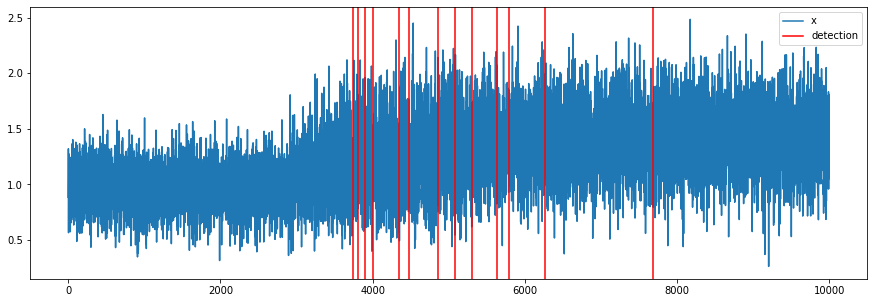

In [90]:
draw_plot(change_points2, warning_zone2, series2)

In [81]:
change_points3, warning_zone3 = adwin(series3)

**PageHinkley**

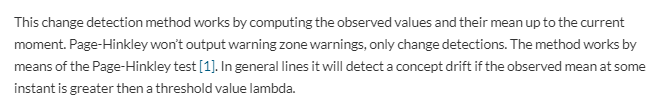

In [98]:
Image(filename = "image/PH.PNG")

In [190]:
def page_hinkley(series):
    ph = PageHinkley()
    change_points = []
    for idx, row in series.iterrows():
        if ph.detected_change():
            change_points.append(idx)
            print("Change has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
    return change_points

In [187]:
change_points1 = page_hinkley(series1)

In [188]:
change_points2 = page_hinkley(series2)

In [189]:
change_points3 = page_hinkley(series3)

**HDDM_A**

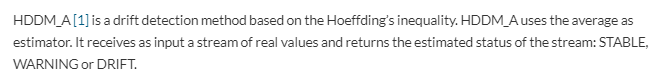

In [112]:
Image(filename = "image/HDDM_A.PNG")

In [104]:
def hddm_a(series):
    hddm_a = HDDM_A()
    change_points = []
    warning_zone = []
    for idx, row in series.iterrows():
        hddm_a.add_element(row['x'])
        if hddm_a.detected_warning_zone():
            warning_zone.append(idx)
            print("Warning zone has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
        if hddm_a.detected_change():
            change_points.append(idx)
            print("Change has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
    return change_points, warning_zone

In [106]:
change_points1, warning_zone1 = hddm_a(series1)

Warning zone has been detected in data: 2.00459469233892 - of index: 2813
Warning zone has been detected in data: 1.68119171071907 - of index: 2814
Change has been detected in data: 2.11208293662577 - of index: 2815
Warning zone has been detected in data: 2.22690467136115 - of index: 3212
Warning zone has been detected in data: 1.68234291544018 - of index: 3213
Change has been detected in data: 2.22582307329238 - of index: 3214
Warning zone has been detected in data: 1.99836995472255 - of index: 3613
Warning zone has been detected in data: 1.73321426103412 - of index: 3614
Warning zone has been detected in data: 1.876853257374 - of index: 3615
Warning zone has been detected in data: 1.51646525287502 - of index: 3616
Warning zone has been detected in data: 1.73317079962479 - of index: 3617
Change has been detected in data: 2.60947333451035 - of index: 3618
Warning zone has been detected in data: 2.0114436004937 - of index: 4023
Warning zone has been detected in data: 1.77237070904078 - 

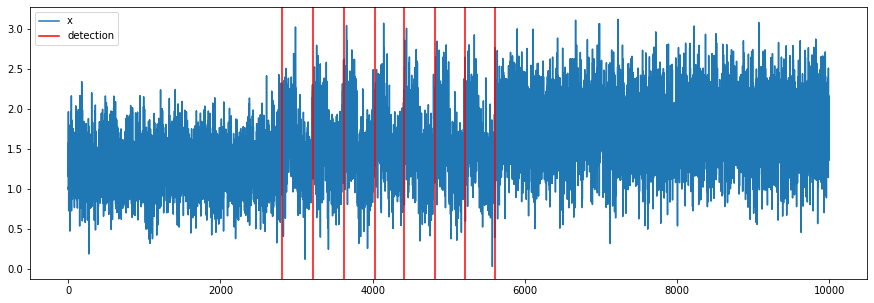

In [107]:
draw_plot(change_points1, warning_zone1, series1)

In [108]:
change_points2, warning_zone2 = hddm_a(series2)

Warning zone has been detected in data: 1.23547082863237 - of index: 3421
Warning zone has been detected in data: 2.06441057806672 - of index: 3426
Warning zone has been detected in data: 0.840378985878637 - of index: 3427
Warning zone has been detected in data: 0.860497092928573 - of index: 3428
Warning zone has been detected in data: 0.868726533108757 - of index: 3429
Warning zone has been detected in data: 1.09399741162343 - of index: 3430
Warning zone has been detected in data: 1.08322385521013 - of index: 3431
Warning zone has been detected in data: 1.65081133019629 - of index: 3432
Warning zone has been detected in data: 0.993840644258154 - of index: 3433
Warning zone has been detected in data: 1.16089423102528 - of index: 3434
Warning zone has been detected in data: 0.925683901867633 - of index: 3435
Warning zone has been detected in data: 0.747150522094533 - of index: 3436
Warning zone has been detected in data: 0.72096802338079 - of index: 3437
Warning zone has been detected i

Warning zone has been detected in data: 1.52095466708067 - of index: 4792
Warning zone has been detected in data: 1.38961537738837 - of index: 4793
Warning zone has been detected in data: 1.4965138053342 - of index: 4794
Warning zone has been detected in data: 1.78509766607833 - of index: 4795
Warning zone has been detected in data: 0.902434570091967 - of index: 4796
Warning zone has been detected in data: 1.13483661794954 - of index: 4797
Warning zone has been detected in data: 0.97760479630814 - of index: 4798
Warning zone has been detected in data: 1.33609183596084 - of index: 4799
Warning zone has been detected in data: 0.596281058890652 - of index: 4800
Warning zone has been detected in data: 1.16843368705608 - of index: 4801
Warning zone has been detected in data: 0.827344119541596 - of index: 4802
Warning zone has been detected in data: 1.52037158115168 - of index: 4803
Warning zone has been detected in data: 1.42880640488893 - of index: 4804
Warning zone has been detected in da

Warning zone has been detected in data: 1.71841732016029 - of index: 7739
Warning zone has been detected in data: 1.3106828555139 - of index: 7740
Warning zone has been detected in data: 1.71785087130995 - of index: 7741
Warning zone has been detected in data: 2.06504298250756 - of index: 7742
Warning zone has been detected in data: 1.33093377273689 - of index: 7743
Warning zone has been detected in data: 1.14350745602141 - of index: 7744
Warning zone has been detected in data: 1.21362131213129 - of index: 7745
Warning zone has been detected in data: 1.28467242908009 - of index: 7746
Warning zone has been detected in data: 1.4887867577178 - of index: 7747
Warning zone has been detected in data: 1.62779454095517 - of index: 7748
Warning zone has been detected in data: 2.09842449264006 - of index: 7749
Warning zone has been detected in data: 1.23684492263647 - of index: 7750
Warning zone has been detected in data: 1.086540636206 - of index: 7751
Warning zone has been detected in data: 2.

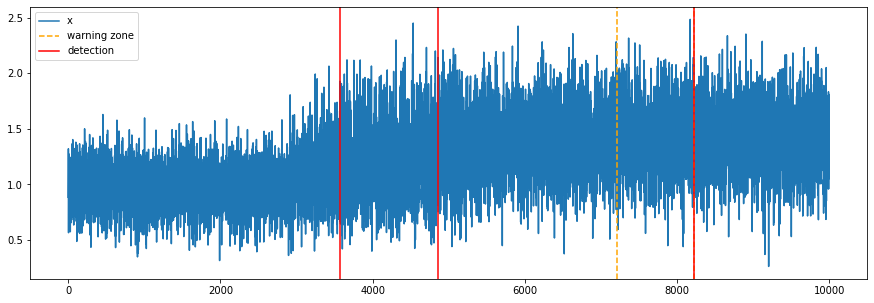

In [109]:
draw_plot(change_points2, warning_zone2, series2)

In [110]:
change_points3, warning_zone3 = hddm_a(series3)

Warning zone has been detected in data: 0.870611138835603 - of index: 68
Warning zone has been detected in data: 1.32398614442315 - of index: 72
Warning zone has been detected in data: 0.465988769665641 - of index: 73
Warning zone has been detected in data: 1.35458104793124 - of index: 74
Change has been detected in data: 1.18380283851531 - of index: 75
Change has been detected in data: 1.91156127549699 - of index: 114
Warning zone has been detected in data: 0.94741925670706 - of index: 193
Warning zone has been detected in data: 1.6286136300151 - of index: 266
Warning zone has been detected in data: 0.437399630276184 - of index: 267
Warning zone has been detected in data: 0.930808354913266 - of index: 275
Change has been detected in data: 1.68202787325738 - of index: 286
Warning zone has been detected in data: 0.843480748201144 - of index: 298
Change has been detected in data: 1.799212176082 - of index: 299
Warning zone has been detected in data: 1.56030958135055 - of index: 320
Warni

Change has been detected in data: 2.02756434398755 - of index: 3792
Warning zone has been detected in data: 1.63260135289966 - of index: 3805
Warning zone has been detected in data: 1.35934939605022 - of index: 3807
Warning zone has been detected in data: 0.246568145033446 - of index: 3808
Warning zone has been detected in data: 0.71121988659233 - of index: 3809
Warning zone has been detected in data: 2.06768306059183 - of index: 3825
Warning zone has been detected in data: 1.00423541582558 - of index: 3826
Warning zone has been detected in data: -1.08120898002722 - of index: 3827
Warning zone has been detected in data: 0.935939465750026 - of index: 3828
Warning zone has been detected in data: 1.35455385372459 - of index: 3830
Warning zone has been detected in data: 1.84110085982825 - of index: 3831
Warning zone has been detected in data: 0.559669754833659 - of index: 3832
Warning zone has been detected in data: 0.575382709096817 - of index: 3833
Warning zone has been detected in data:

Warning zone has been detected in data: 0.366571943773592 - of index: 8760
Warning zone has been detected in data: 1.0797152438683 - of index: 8761
Change has been detected in data: 1.65455812508702 - of index: 8762
Warning zone has been detected in data: 1.49240308269978 - of index: 8896
Change has been detected in data: 2.65448870614414 - of index: 9082
Change has been detected in data: 2.07701787295588 - of index: 9109
Warning zone has been detected in data: 1.24723403438726 - of index: 9189
Warning zone has been detected in data: 0.904051198099192 - of index: 9191
Warning zone has been detected in data: 0.778766686419567 - of index: 9192
Change has been detected in data: 2.51982499234576 - of index: 9252
Warning zone has been detected in data: 1.65354823425531 - of index: 9343
Warning zone has been detected in data: 1.50591765488446 - of index: 9485
Change has been detected in data: 0.850043229925678 - of index: 9486
Warning zone has been detected in data: 1.95751633157448 - of ind

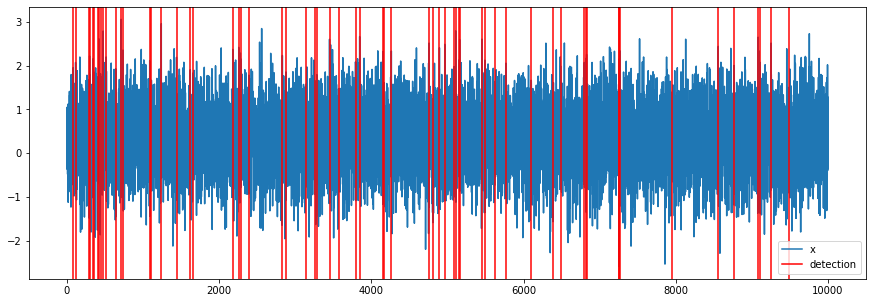

In [111]:
draw_plot(change_points3, warning_zone3, series3)

**KSWIN**

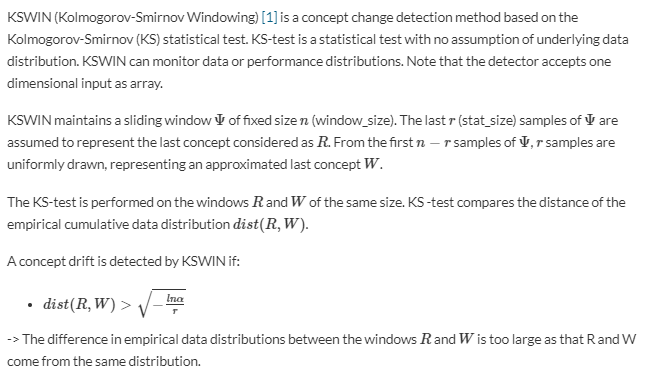

In [134]:
Image(filename = "image/KSWIN.PNG")

In [136]:
def kswin(series, window_size):
    kswin = KSWIN(alpha=0.01, window_size=window_size)
    change_points = []
    warning_zone = []
    for idx, row in series.iterrows():
        kswin.add_element(row['x'])
        if kswin.detected_warning_zone():
            warning_zone.append(idx)
            print("Warning zone has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
        if kswin.detected_change():
            change_points.append(idx)
            print("Change has been detected in data: {} "
                  "- of index: {}".format(row['x'],idx))
    return change_points, warning_zone

In [127]:
change_points1, warning_zone1 = kswin(series1, 100)

Change has been detected in data: 1.0825930120051 - of index: 168
Change has been detected in data: 1.87664675288302 - of index: 265
Change has been detected in data: 1.33921629475883 - of index: 422
Change has been detected in data: 1.34303062433771 - of index: 590
Change has been detected in data: 1.32048928161312 - of index: 710
Change has been detected in data: 1.32293809962656 - of index: 857
Change has been detected in data: 0.785382854427117 - of index: 1062
Change has been detected in data: 1.40907077318928 - of index: 1242
Change has been detected in data: 1.17856615908021 - of index: 1415
Change has been detected in data: 1.11303013091616 - of index: 1620
Change has been detected in data: 0.781230533828246 - of index: 2366
Change has been detected in data: 1.16495799315732 - of index: 2659
Change has been detected in data: 2.11208293662577 - of index: 2815
Change has been detected in data: 2.30794109050237 - of index: 2940
Change has been detected in data: 1.46179258002496 - 

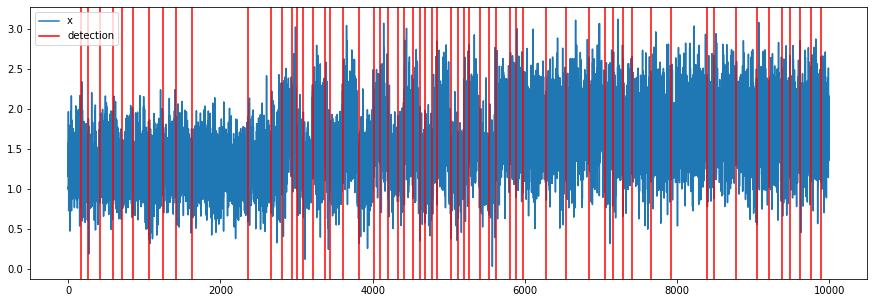

In [128]:
draw_plot(change_points1, warning_zone1, series1)

In [129]:
change_points1, warning_zone1 = kswin(series1, 300)

Change has been detected in data: 1.13839840129196 - of index: 398
Change has been detected in data: 0.640985943687591 - of index: 840
Change has been detected in data: 1.00299442489544 - of index: 1430
Change has been detected in data: 1.00511498557723 - of index: 1853
Change has been detected in data: 0.834103037684788 - of index: 2359
Change has been detected in data: 1.24835054495245 - of index: 2818
Change has been detected in data: 1.66446247682377 - of index: 3088
Change has been detected in data: 2.25052739877586 - of index: 3358
Change has been detected in data: 1.05416254176586 - of index: 3631
Change has been detected in data: 0.875806620901641 - of index: 3901
Change has been detected in data: 2.02037685862486 - of index: 4195
Change has been detected in data: 2.15312972547947 - of index: 4465
Change has been detected in data: 0.537599164546171 - of index: 4737
Change has been detected in data: 1.29638422798555 - of index: 5030
Change has been detected in data: 1.0366825411

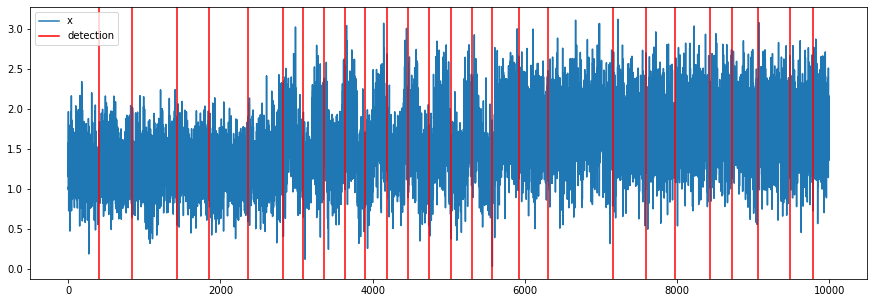

In [130]:
draw_plot(change_points1, warning_zone1, series1)

In [143]:
change_points2, warning_zone2 = kswin(series2, 100)

Change has been detected in data: 0.815564776648307 - of index: 700
Change has been detected in data: 1.2236746121884 - of index: 1087
Change has been detected in data: 0.830542998342415 - of index: 1239
Change has been detected in data: 0.828260534726155 - of index: 1457
Change has been detected in data: 0.877750790679443 - of index: 1620
Change has been detected in data: 0.785080893179231 - of index: 1880
Change has been detected in data: 1.03487511474424 - of index: 2029
Change has been detected in data: 0.819231927510252 - of index: 2350
Change has been detected in data: 1.16833708847074 - of index: 2761
Change has been detected in data: 0.769766003948449 - of index: 2839
Change has been detected in data: 0.921365077048055 - of index: 2923
Change has been detected in data: 1.28699666366263 - of index: 3417
Change has been detected in data: 1.05060204961674 - of index: 3737
Change has been detected in data: 2.11963577872424 - of index: 3837
Change has been detected in data: 1.238652

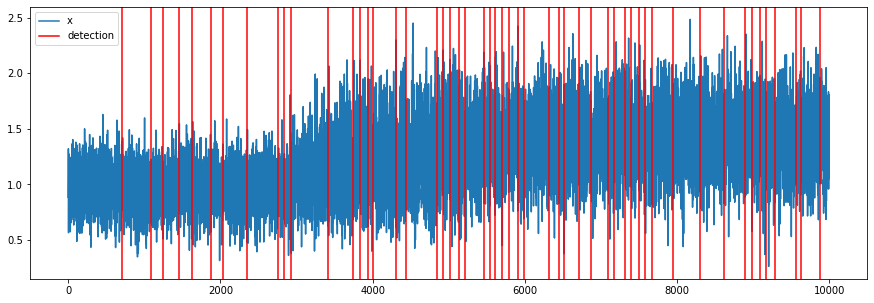

In [144]:
draw_plot(change_points2, warning_zone2, series2)

In [145]:
change_points2, warning_zone2 = kswin(series2, 300)

Change has been detected in data: 0.978003662049555 - of index: 987
Change has been detected in data: 0.899319584732949 - of index: 1425
Change has been detected in data: 0.727985888653854 - of index: 1885
Change has been detected in data: 1.01880079394428 - of index: 2380
Change has been detected in data: 1.17459915631246 - of index: 2744
Change has been detected in data: 0.942448429068645 - of index: 3278
Change has been detected in data: 1.26677957990088 - of index: 3574
Change has been detected in data: 1.0794048103067 - of index: 3957
Change has been detected in data: 0.610039718478807 - of index: 4305
Change has been detected in data: 1.05799874011521 - of index: 4594
Change has been detected in data: 1.67047090059464 - of index: 5010
Change has been detected in data: 1.39272496269596 - of index: 5307
Change has been detected in data: 1.29670745812256 - of index: 5733
Change has been detected in data: 1.66104874115942 - of index: 6311
Change has been detected in data: 1.312752756

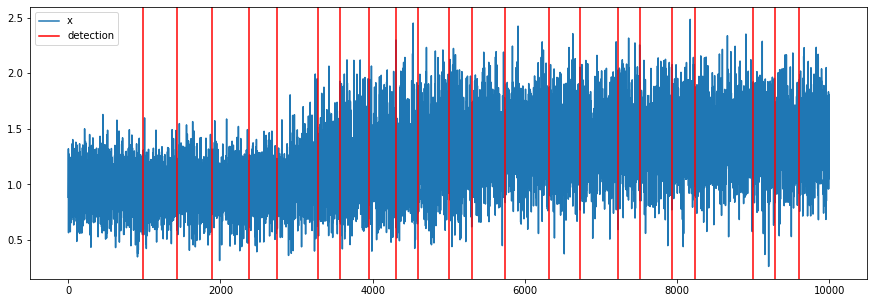

In [146]:
draw_plot(change_points2, warning_zone2, series2)

In [149]:
change_points3, warning_zone3 = kswin(series3, 100)

Change has been detected in data: 0.775263547062645 - of index: 211
Change has been detected in data: -0.107413052393977 - of index: 355
Change has been detected in data: -1.86669829396446 - of index: 437
Change has been detected in data: 0.45695751224137 - of index: 547
Change has been detected in data: 0.49347940534303 - of index: 808
Change has been detected in data: 0.270335269252211 - of index: 929
Change has been detected in data: -0.659911674384686 - of index: 1033
Change has been detected in data: 1.67424676604667 - of index: 1222
Change has been detected in data: 0.26742417070627 - of index: 1308
Change has been detected in data: 0.197279818075273 - of index: 1442
Change has been detected in data: -0.254792203586282 - of index: 1528
Change has been detected in data: 1.46105184335268 - of index: 1602
Change has been detected in data: 0.217096267813559 - of index: 1839
Change has been detected in data: 0.23498778383107 - of index: 1975
Change has been detected in data: 1.0902961

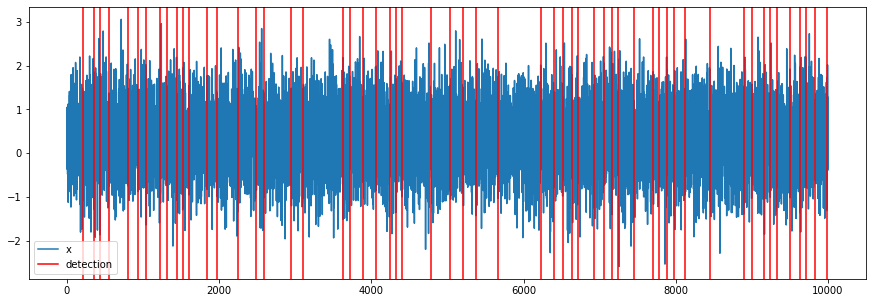

In [150]:
draw_plot(change_points3, warning_zone3, series3)

In [151]:
change_points3, warning_zone3 = kswin(series3, 300)

Change has been detected in data: 0.069833885974006 - of index: 396
Change has been detected in data: -0.73878845870345 - of index: 813
Change has been detected in data: -0.466800594204556 - of index: 1261
Change has been detected in data: 0.632292589907159 - of index: 1633
Change has been detected in data: -0.431621740890977 - of index: 1988
Change has been detected in data: -0.56328429700355 - of index: 2501
Change has been detected in data: 0.41643287087119 - of index: 2956
Change has been detected in data: 0.637580085401047 - of index: 3227
Change has been detected in data: -0.112476048891309 - of index: 3547
Change has been detected in data: 1.13271766739509 - of index: 3848
Change has been detected in data: -1.45826402927145 - of index: 4236
Change has been detected in data: 0.0474696614405285 - of index: 4583
Change has been detected in data: 0.572169871042674 - of index: 4986
Change has been detected in data: -0.206696119982657 - of index: 5377
Change has been detected in data:

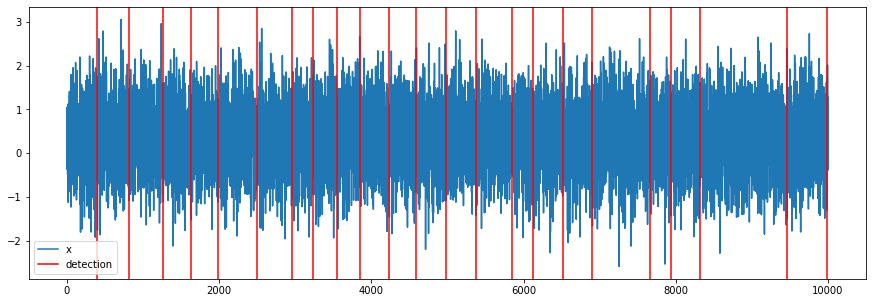

In [152]:
draw_plot(change_points3, warning_zone3, series3)

### Wnioski

1. Testowane metody:
- DDM (Drift Detection Method)
- ADWIN (Adaptive Windowing)
- Page Hinkley
- HDDM_A (Drift Detection Method based on Hoeffding’s bounds with moving average-test)
- KSWIN (Kolmogorov-Smirnov Windowing)

2. Wyniki
- DDM:
    - Pierwszy zbiór - brak detekcji
    - Drugi zbiór - sensowne detekcje
    - Trzeci zbiór - szumy
- ADWIN:
    - Pierwszy zbiór - sporo szumów 
    - Drugi zbiór - sporo szumów
    - Trzeci zbiór - brak detekcji
- Page Hinkley
    - Pierwszy zbiór - brak detekcji
    - Drugi zbiór - brak detekcji
    - Trzeci zbiór - brak detekcji
    - Być może to kwestia odpowiedniego ustawienia parametru threshold
- HDDM_A
    - Pierwszy zbiór - sensowne detekcje
    - Drugi zbiór - sensowne + szumy
    - Trzeci zbiór - szumy
- KSWIN
    - Wyniki zależą od wielkości okna - sensowniejsze wyniki dla większego
    - Metoda wyłapuje trendy jednak jest bardzo wrażliwa, dosyć mocno rozbija strumień
    - Pierwszy zbiór - sporo szumów
    - Drugi zbiór - sporo szumów
    - Trzeci zbiór - sporo szumów 

3. Poprawnie oznaczone zmiany:
- Zbiór 1: HDDM_A
- Zbiór 2: DDM, HDDM_A (Trochę za daleko + kilka dodatkowych oznaczeń)
- Zbiór 3: ADWIN - brak zmian

4. Parametry:
Metody testowane były na domyślnych parametrach z wyjątkiem KSWIN, gdzie dodatkowo przebadano różne wielkości okna.

Metody zadziałały z różnym skutkiem w zależności od strumienia. Zadanie wykrywania concept driftu jest trudne i ciężko znaleźć uniwersalną metodę.